In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import axitram
import matplotlib.pyplot as pt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# 2 sources
# index, lat, lon, depth
sources=np.array([[1, 45.100, 2.000, 5000.000],
                  [2, 45.200, 2.000, 5000.000]])

In [23]:
# 5 receivers with geographical coordinates
# index, lat, lon, depth
stations=np.array(
        [[1, 45.000, 2.000, 0.000],
         [2, 46.000, 1.000, 0.000],
         [3, 46.000, 3.000, 0.000],
         [4, 44.000, 1.000, 0.000],
         [5, 44.000, 3.000, 0.000]])

In [24]:
# 2 layers
# thickness (or top), Vp, Vs, rho, Qp, Qs
model = np.array([[1000., 5000., 2886., 2700., 1000., 500.],
                  [0., 6000., 3886., 2700., 1000., 500.]])

In [25]:
# Compute green's function
# fmax = 20Hz
# duration = 50 sec
ap=axitram.moment_green(model,stations,sources,duration=50.,fmax=20.,latlon=True)

./axitra ran sucessfully


In [26]:
# history of source
hist = np.array([[1,7.5e20,148.0,84.0,-47.0,0.,0.,20.0],
                 [2,7.5e20,148.0,84.0,-47.0,0.,0.,20.0]])

In [27]:
# first convolution example
# source= ricker
# source time width = 3 sec
# output unit = displacement
t, sx, sy, sz = axitram.moment_conv(ap,hist,source_type=1,t0=2,unit=1)

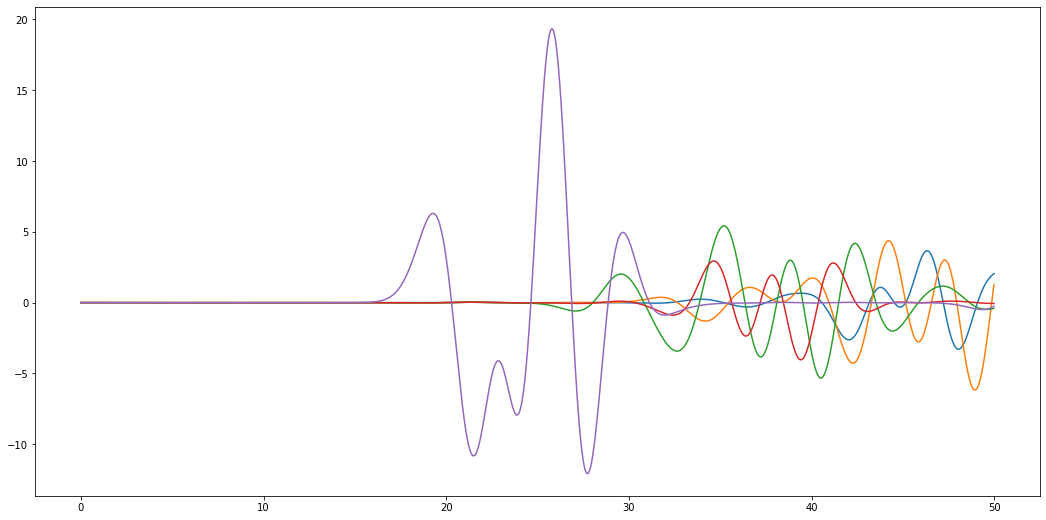

In [28]:
pt.figure(figsize=(18, 9))
ier=pt.plot(t,sx[1,:],t,sx[2,:],t,sx[3,:],t,sx[4,:],t,sx[0,:],)

In [29]:
# convolution with a user provided source function
# A dirac of unit 1 at 10th sample
sfunc=np.zeros((ap.npt,),dtype='float64')
sfunc[10]=1.
t, sx, sy, sz = axitram.moment_conv(ap,hist,source_type=3,t0=3,unit=1,sfunc=sfunc)

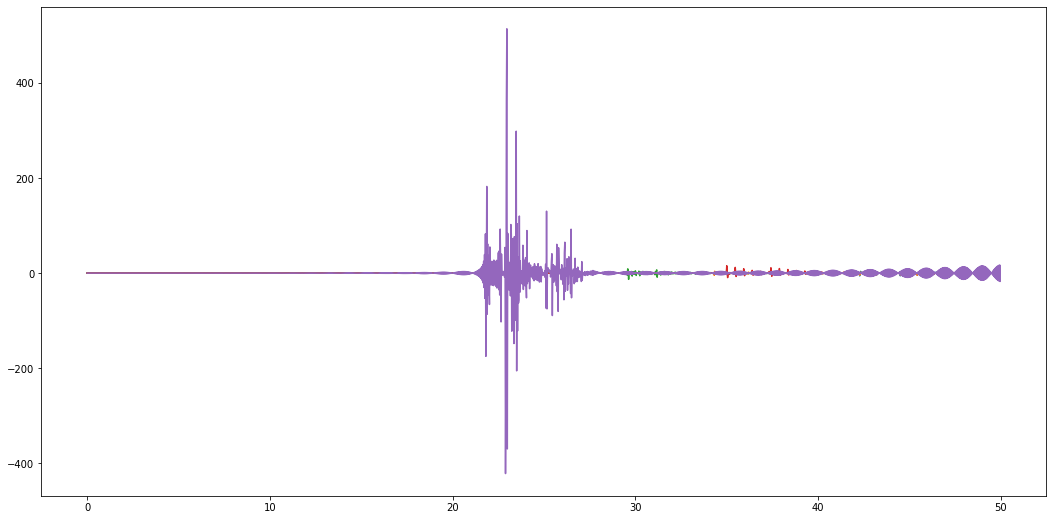

In [30]:
pt.figure(figsize=(18, 9))
ier=pt.plot(t,sx[1,:],t,sx[2,:],t,sx[3,:],t,sx[4,:],t,sx[0,:],)

In [31]:
#clean all files o disk relative to this example
ap.clean()

In [19]:
help(axitram.moment_green)

Help on function moment_green in module axitram:

moment_green(model, stations, sources, duration, fmax, xl=0.0, latlon=False, freesurface=True, ikmax=10000, axpath='.')
    Compute the Green's functions for the set of parameters supplied and for moment tensor sources
    The (6 x nfreq x nsources x nstations) Green's functions are stored in a file on disk, the next step is to
    convolve them with the source function(s) using moment_conv() in order to obtain the
    seismograms.
    
    This function write several input files on disk and call the fortran program "axitra" according
    to the path 'axpath'. The input/output files are of the form "axi_???.suffix" where axi_??? can be obtain
    from the returned Axitra class instance by class.sid
    
    Input parameters:
    - model = (nlayer x 5) ndarray defining the velocity model
            top_depth/thickness, vp, vs, rho, qp, qs
    - stations = (nstations x 4) ndarray giving the station index and coordinates
    - sources = (

In [21]:
help(axitram.moment_conv)

Help on function moment_conv in module axitram:

moment_conv(ap, hist, source_type, t0, t1=0.0, unit=1, sfunc=None)
    Compute the convolution of Green's function obtained by a previous call to moment_green()
    by source time functions.
    
    Input:
    ap = Axitra class instance from moment_green
    hist = source history array (nsource x 6)
           index, moment(Nm), strike, dip, rake, 0., 0., delay
           index, slip, strike, dip, rake, width, height, delay
    source_type =
        0 : Dirac
        1 : Ricker
        2 : step
        3 : source time function stored in file <header>.sou
        4 : triangle
        5 : ramp
        6 : not used....
        7 : True step (watch high frequencies cutoff!!)
        8 : Trapezoid
    
    t0 = rise time
    t1 = optional time for some sources
    unit = unit on output (1=disp, 2=vel, 3=acc)
    sfunc = source function signal given as numpy array
    
    Return:
        A time 1D ndarray and three 2D ndarrays of size (nstat